In [1]:
import fitting_tools as ft
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [2]:
data0 = np.random.random((2,100))
data1 = np.random.random((2,100))



<IPython.core.display.Javascript object>


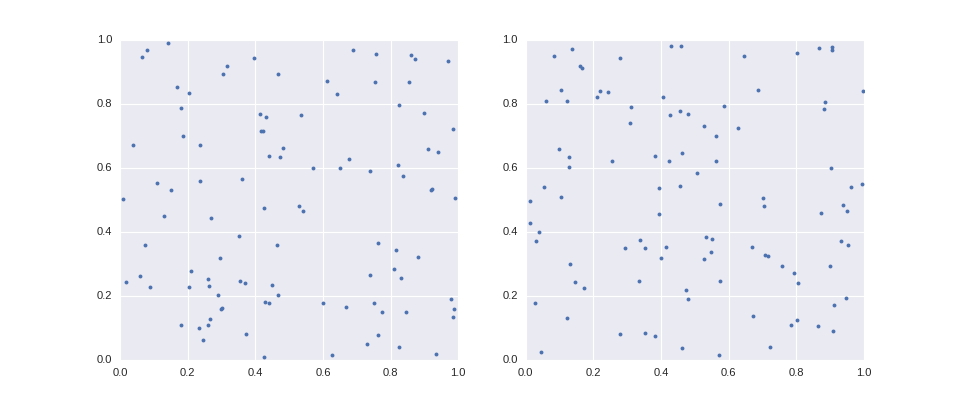

In [3]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(data0[0],data0[1],'.')
plt.subplot(1,2,2)
plt.plot(data1[0],data1[1],'.')

In [4]:
start = time.time()
nn_CPU = ft.nn(data0,data1,nneighbors=5)
print "This took %f seconds to run" % (time.time()-start)

[  4.19545119e-04   7.51568869e-03   1.07860414e-02   1.42916008e-02
   1.51136819e-02   1.51920310e-02   1.67377689e-02   1.86067241e-02
   2.59790548e-02   3.06860951e-02   3.30956967e-02   3.31877460e-02
   3.48185091e-02   4.30727384e-02   4.51086156e-02   4.57464079e-02
   4.80178639e-02   5.08468009e-02   5.33202877e-02   5.50194868e-02
   5.57612994e-02   6.71428860e-02   8.70544841e-02   9.82012781e-02
   1.00310864e-01   1.06273033e-01   1.10526839e-01   1.12154637e-01
   1.13143347e-01   1.20839313e-01   1.23501665e-01   1.31147354e-01
   1.31777259e-01   1.37242360e-01   1.38333537e-01   1.43488629e-01
   1.45145290e-01   1.49399298e-01   1.52068066e-01   1.53756512e-01
   1.66236953e-01   1.71197056e-01   1.76352256e-01   1.77346548e-01
   1.77564884e-01   1.79135084e-01   1.79250312e-01   1.83268778e-01
   1.88909928e-01   1.93361963e-01   2.02005493e-01   2.03377394e-01
   2.04851271e-01   2.14808656e-01   2.37220615e-01   2.45299793e-01
   2.49358280e-01   2.64078494e-01

In [5]:
start = time.time()
nn_GPU = ft.nn(data0,data1,nneighbors=5)
print "This took %f seconds to run" % (time.time()-start)

[  4.19545119e-04   7.51568869e-03   1.07860414e-02   1.42916008e-02
   1.51136819e-02   1.51920310e-02   1.67377689e-02   1.86067241e-02
   2.59790548e-02   3.06860951e-02   3.30956967e-02   3.31877460e-02
   3.48185091e-02   4.30727384e-02   4.51086156e-02   4.57464079e-02
   4.80178639e-02   5.08468009e-02   5.33202877e-02   5.50194868e-02
   5.57612994e-02   6.71428860e-02   8.70544841e-02   9.82012781e-02
   1.00310864e-01   1.06273033e-01   1.10526839e-01   1.12154637e-01
   1.13143347e-01   1.20839313e-01   1.23501665e-01   1.31147354e-01
   1.31777259e-01   1.37242360e-01   1.38333537e-01   1.43488629e-01
   1.45145290e-01   1.49399298e-01   1.52068066e-01   1.53756512e-01
   1.66236953e-01   1.71197056e-01   1.76352256e-01   1.77346548e-01
   1.77564884e-01   1.79135084e-01   1.79250312e-01   1.83268778e-01
   1.88909928e-01   1.93361963e-01   2.02005493e-01   2.03377394e-01
   2.04851271e-01   2.14808656e-01   2.37220615e-01   2.45299793e-01
   2.49358280e-01   2.64078494e-01

<IPython.core.display.Javascript object>


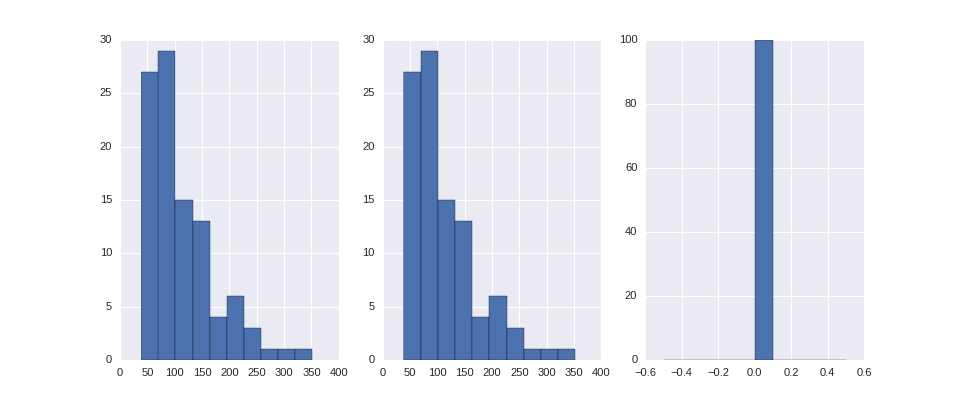

(array([   0.,    0.,    0.,    0.,    0.,  100.,    0.,    0.,    0.,    0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.hist(nn_CPU,label="CPU")
plt.subplot(1,3,2)
plt.hist(nn_GPU,label="GPU")
plt.subplot(1,3,3)
plt.hist(nn_GPU-nn_CPU,label="diff")

In [7]:
# Get the GPU info
import numba
import math
npts = 100
my_gpu = numba.cuda.get_current_device()
thread_ct = my_gpu.WARP_SIZE
block_ct = int(math.ceil(float(npts) / thread_ct))

frac_nn_GPU = np.zeros(npts, dtype = np.float32)
nneigh=5


start = time.time()
#ft.nn_GPU[block_ct,thread_ct](np.float32(data0[0]), np.float32(data0[1]), np.float32(data1[0]), np.float32(data1[1]), frac_nn_GPU, nneighbors=5)

#ft.nn_kernel_GPU[block_ct,thread_ct](np.float32(data0[0]), np.float32(data0[1]), np.float32(data1[0]), np.float32(data1[1]), frac_nn_GPU)

print np.float32(data0[0])
ft.number_of_nearest_neighbors_GPU[block_ct, thread_ct](np.float32(data0[0]), np.float32(data0[1]), np.float32(data1[0]), np.float32(data1[1]), frac_nn_GPU, 0.1)
print "Time for GPU implementation:  %f" % (time.time()-start)




print frac_nn_GPU

frac_nn_GPU.sort()

print frac_nn_GPU
radius2=frac_nn_GPU[nneigh-1]
print radius2




[ 0.35400325  0.18096158  0.82994711  0.75331277  0.56942767  0.53029358
  0.73868668  0.74048758  0.13156067  0.42457503  0.15065338  0.42361927
  0.62740755  0.41628686  0.66816193  0.24596339  0.65046227  0.16968073
  0.64220339  0.29902831  0.0872321   0.98853528  0.97790974  0.10824663
  0.87270385  0.26845834  0.87977302  0.43123251  0.00789227  0.23698507
  0.61168325  0.5361293   0.68959367  0.41415709  0.82552958  0.97037965
  0.99049467  0.75158077  0.20403239  0.18088743  0.35080284  0.0192153
  0.4670434   0.23388101  0.93294859  0.98483938  0.1417253   0.92254353
  0.30564201  0.29438534  0.48233235  0.75582284  0.91127068  0.46561745
  0.85498309  0.42978436  0.47271514  0.1864465   0.82240671  0.36974487
  0.39765069  0.30069545  0.60081053  0.37288401  0.05925923  0.4674207
  0.42542577  0.35964978  0.3168903   0.73085874  0.82561332  0.20287424
  0.81571358  0.91828847  0.44865805  0.84619874  0.54120713  0.26344383
  0.76284689  0.23667288  0.810179    0.29012442  0.6

In [ ]:
def bubblesort(X):
    N = len(X)
    for end in range(N, 1, -1):
        for i in range(end - 1):
            cur = X[i]
            if cur > X[i + 1]:
                tmp = X[i]
                X[i] = X[i + 1]
                X[i + 1] = tmp

In [ ]:
#array=np.array([4,5,11,3,1,9,0,8,30])
#array = np.random.random(10000)
#bubblesort(array)
#print array

In [ ]:
#array=np.array([4,5,11,3,1,9,0,8,30])
array = np.random.random(1024)
ft.bubblesort_jit[32,32](array)
print array

In [ ]:
import accelerate.cuda.sorting as csort

In [ ]:
#npts = 16777216
npts = 16384
array = np.random.random(npts)

print array
start = time.time()
array.sort()
print "This sort took %f seconds" % (time.time()-start)
print array


In [ ]:
mysort = csort.RadixSort(npts,float)

array = np.random.random(npts)
print array
start = time.time()
mysort.sort(array)
print "This sort took %f seconds" % (time.time()-start)
print array


In [ ]:
array = np.random.random(1024)
print array
mysort.sort(array)
print array

In [ ]:
npts = 10000

ndata = 1000
nMC = 10000

array = np.random.random((ndata,nMC))

start = time.time()
array = array.flatten()
index = np.arange(0,ndata*nMC).astype(np.uint32)
x = np.arange(nMC,ndata*nMC,nMC).astype(np.uint32)

segsort = csort.segmented_sort(array,index,x)
print "This sort took %f seconds" % (time.time()-start)

print array[nMC-10:nMC]
print array[nMC:nMC+10]


In [ ]:
array = np.random.random((ndata,nMC))

start = time.time()
for a in array:
    a.sort()
print "This sort took %f seconds" % (time.time()-start)


In [ ]:
array[1]

In [ ]:
x